<font color="#CC3D3D"><p>
# Build models using PyCaret (a low-code ML library)

#### 장점
- 적은 코드로 가장 효율적인 코딩 가능(But, 이 점이 장점이자 단점이 됨).
- 모델 파라미터 튜닝 하기 전 가장 성능이 잘 나올 모델 후보군 추리기 용이함.
#### 단점
- 앞서 언급했드시 디테일한 코딩을 하기 어려워보임.

- `INPUT`: 학습용(`X_train.csv`, `y_train`)과 평가용(`X_test.csv`) 데이터 
- `OUTPUT`: 위 데이터를 이용하여 구축한 모형이 생성한 예측결과(`submission.csv`)

### Imports 패키지

In [1]:
import pandas as pd
import matplotlib.pylab as plt 
from matplotlib import font_manager, rc 
import seaborn as sns 
%matplotlib inline
import platform

### 1. Read Data

In [2]:
# 학습용과 평가용(제출용) 데이터를 읽어들인다.
train = pd.read_csv('X_train.csv', encoding='cp949')
test = pd.read_csv('X_test.csv', encoding='cp949')

# 학습용 정답 데이터를 읽는다.
y_train = pd.read_csv('y_train.csv', encoding='cp949')

### 2. Set up Environment
*This step initializes the training environment and performs the data preprocessing & feature engineering.*

In [3]:
from pycaret.classification import *

df = train.merge(y_train)
exp01 = setup(
    df, target='gender', ignore_features=['cust_id'], session_id=123,
    numeric_imputation = 'zero',
    normalize = True,
    transformation = True,
    feature_selection = True, feature_selection_threshold = 0.8,
)

Setup Succesfully Completed!


,Description,Value
0,session_id,123
1,Target Type,Binary
2,Label Encoded,"0: 0, 1: 1"
3,Original Data,"(3500, 28)"
4,Missing Values,True
5,Numeric Features,25
6,Categorical Features,2
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [4]:
# Preprocessed Data
get_config('X_train')

,주구매상품_골프,주구매상품_캐주얼,주구매지점_창원점,주구매상품_남성 트랜디,주구매지점_청량리점,주구매상품_소형가전,주구매지점_전주점,주구매상품_생활잡화,주구매상품_구두,주구매상품_남성정장,...,주구매상품_대형가전,주구매지점_대구점,주구매상품_일용잡화,구매상품종류1,주구매지점_강남점,내점당구매건수,주구매상품_통신/컴퓨터,주구매지점_일산점,구매상품종류3,내점당구매액
2563,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.453351,0.0,0.814210,0.0,0.0,0.703921,2.129251
2241,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-0.756204,0.0,-1.470188,0.0,0.0,-0.948477,2.349358
790,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.461059,0.0,1.684143,0.0,0.0,0.899447,-0.800941
916,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.461059,0.0,0.317383,0.0,0.0,1.394388,0.073420
1811,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-0.131137,0.0,-0.927193,0.0,0.0,0.097555,1.151374
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2258,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-0.858582,0.0,0.680334,0.0,0.0,-0.562058,-1.336182
3116,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.132946,1.0,-0.113627,0.0,0.0,0.804134,-1.187066
3063,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-0.469001,0.0,-0.837748,0.0,0.0,-0.382584,-0.340823
507,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.284287,0.0,0.414678,0.0,0.0,0.703921,-0.412643


In [5]:
# save & load all global variables
#save_config('myvars.pkl')
#load_config('myvars.pkl')

### 3. Compare Models
*This step trains and evaluates performance of all estimators available in the model library using cross validation.*

In [6]:
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors.KNeighborsClassifier,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model.SGDClassifier,True
rbfsvm,SVM - Radial Kernel,sklearn.svm.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process.GPC,False
mlp,MLP Classifier,sklearn.neural_network.MLPClassifier,False
ridge,Ridge Classifier,sklearn.linear_model.RidgeClassifier,True


In [7]:
clfs = compare_models(n_select=5, exclude=['svm', 'ridge', 'lda', 'catboost', 'gbc'], sort='AUC', fold=5)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
0,Logistic Regression,0.6623,0.6750,0.3920,0.5775,0.4659,0.2320,0.2420,0.0545
1,Extreme Gradient Boosting,0.6582,0.6676,0.3637,0.5740,0.4442,0.2150,0.2273,0.1929
2,Ada Boost Classifier,0.6509,0.6606,0.3833,0.5530,0.4518,0.2080,0.2160,0.2799
3,Naive Bayes,0.6370,0.6478,0.3225,0.5530,0.3828,0.1598,0.1811,0.0074
4,Extra Trees Classifier,0.6403,0.6397,0.3311,0.5353,0.4081,0.1704,0.1808,0.2709
5,Light Gradient Boosting Machine,0.6235,0.6315,0.3757,0.5021,0.4290,0.1566,0.1609,0.2220
6,Random Forest Classifier,0.6166,0.5986,0.2855,0.4835,0.3589,0.1106,0.1184,0.1155
7,K Neighbors Classifier,0.6068,0.5866,0.3561,0.4705,0.4044,0.1197,0.1225,0.0449
8,Quadratic Discriminant Analysis,0.5867,0.5834,0.3476,0.5153,0.3238,0.0787,0.1084,0.0193
9,Decision Tree Classifier,0.5610,0.5378,0.4430,0.4208,0.4315,0.0744,0.0745,0.0491


### 4. Tune Models
*This step tunes the hyperparameters of a given estimator.*

In [8]:
tuned_models = [tune_model(m, optimize='AUC', n_iter=30, fold=5) for m in clfs]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.6245,0.6496,0.0000,0.0000,0.0000,0.0000,0.0000
1,0.6245,0.6312,0.0000,0.0000,0.0000,0.0000,0.0000
2,0.6245,0.6946,0.0000,0.0000,0.0000,0.0000,0.0000
3,0.6224,0.6285,0.0000,0.0000,0.0000,0.0000,0.0000
4,0.6237,0.6368,0.0000,0.0000,0.0000,0.0000,0.0000
Mean,0.6239,0.6481,0.0000,0.0000,0.0000,0.0000,0.0000
SD,0.0008,0.0244,0.0000,0.0000,0.0000,0.0000,0.0000


### 5. Ensemble Models

In [9]:
# Averaging
blender = blend_models(estimator_list=tuned_models, method='soft', fold=5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.6612,0.6943,0.5380,0.5500,0.5440,0.2745,0.2746
1,0.6469,0.6611,0.5163,0.5307,0.5234,0.2431,0.2432
2,0.6755,0.7256,0.5054,0.5776,0.5391,0.2905,0.2920
3,0.6327,0.6390,0.4973,0.5140,0.5055,0.2134,0.2135
4,0.6339,0.6631,0.5163,0.5135,0.5149,0.2210,0.2210
Mean,0.6501,0.6766,0.5147,0.5372,0.5254,0.2485,0.2488
SD,0.0164,0.0302,0.0137,0.0243,0.0144,0.0298,0.0303


In [10]:
# Stacking
stacker = stack_models(estimator_list=tuned_models, meta_model=create_model('lr'), fold=5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.6755,0.6910,0.3913,0.6050,0.4752,0.2557,0.2684
1,0.6469,0.6491,0.3750,0.5433,0.4437,0.1977,0.2050
2,0.6816,0.7207,0.3370,0.6458,0.4429,0.2496,0.2755
3,0.6592,0.6497,0.4270,0.5643,0.4862,0.2384,0.2436
4,0.6524,0.6650,0.3696,0.5574,0.4444,0.2063,0.2155
Mean,0.6631,0.6751,0.3800,0.5832,0.4585,0.2296,0.2416
SD,0.0133,0.0274,0.0294,0.0375,0.0185,0.0233,0.0279


### 6. Select Model
*This step returns the best model out of all trained models in current session.*

In [11]:
best_model = automl(optimize='AUC')
best_model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

### 7. Evaluate Model

In [12]:
#matplotlib 한글깨짐 지원

path = "c:/Windows/Fonts/malgun.ttf"
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system...')
rc('axes', unicode_minus=False)  

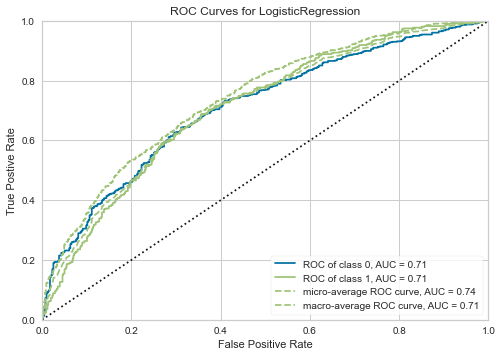

In [13]:
plot_model(best_model, plot='auc')
#plot_model(best_model, plot='learning')

### 8. Make Predictions

In [14]:
# Submission 결과: 0.706886
pred = predict_model(best_model, data=test).Score
#pred = predict_model(best_model, data=test).head(len(test)).Score
pd.DataFrame({'cust_id': test.cust_id, 'gender': pred}).to_csv('caret_submission.csv', index=False)

# Save/load the model
#save_model(best_model, model_name='exp01-model')
#saved_model = load_model('exp01-model')

<font color="#CC3D3D"><p>
# End